# 6.4 Machine Learning / Regression¶


## This script contains the following:
### Importing libraries and data
### Data cleaning
### Data prep for regression analysis
### Regression analysis

## Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\BhuwanDhakal\Sunita\Projects\2 Data Immersion\Advanced analytics $ Dashboard Desigh\Online Shopping Analysis\Data'

In [4]:
df =  pd.read_excel(os.path.join(path, 'Prepared Data', 'Cleaned_Data.xlsx'))

In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Location', 'Tenure_Months', 'Transaction_ID',
       'Transaction_Date', 'Product_ID', 'Product_Description',
       'Product_Category', 'Quantity', 'Avg_Price', 'Delivery_Charges',
       'Coupon_Status', 'TAX', 'Date', 'Offline_Spend', 'Online_Spend',
       'Month', 'Coupon_Code', 'Discount_pct'],
      dtype='object')

In [6]:
df.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_ID,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,TAX,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,17850.0,M,Chicago,12,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,2019-01-01,4500,2424.5,1,ELEC10,10
1,17850.0,M,Chicago,12,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,2019-01-01,4500,2424.5,1,ELEC10,10
2,17850.0,M,Chicago,12,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.5,Not Used,0.1,2019-01-01,4500,2424.5,1,ELEC10,10
3,17850.0,M,Chicago,12,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,81.50,6.5,Clicked,0.1,2019-01-01,4500,2424.5,1,ELEC10,10
4,17850.0,M,Chicago,12,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Clicked,0.1,2019-01-01,4500,2424.5,1,ELEC10,10


## Data Cleaning

In [7]:
# In Location column Replacing Chicago as illinois,
df['Location'].replace({'Chicago': 'Illinois'}, inplace = True)

In [8]:
df.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_ID,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,TAX,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,17850.0,M,Illinois,12,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,2019-01-01,4500,2424.5,1,ELEC10,10
1,17850.0,M,Illinois,12,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,2019-01-01,4500,2424.5,1,ELEC10,10
2,17850.0,M,Illinois,12,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.5,Not Used,0.1,2019-01-01,4500,2424.5,1,ELEC10,10
3,17850.0,M,Illinois,12,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,81.50,6.5,Clicked,0.1,2019-01-01,4500,2424.5,1,ELEC10,10
4,17850.0,M,Illinois,12,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Clicked,0.1,2019-01-01,4500,2424.5,1,ELEC10,10


### Extreme values checks

C:\Users\BhuwanDhakal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Online_Spend', ylabel='Density'>

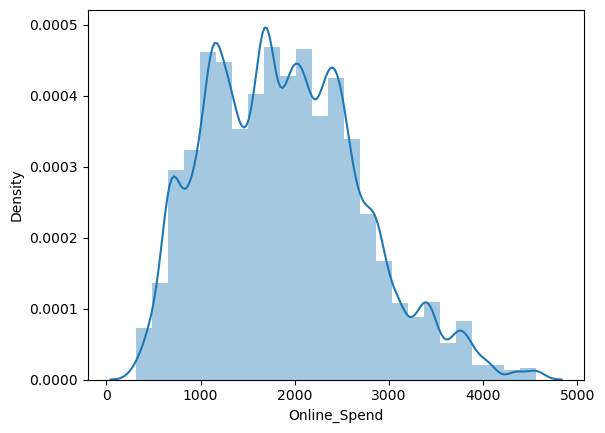

In [9]:
sns.distplot(df['Online_Spend'], bins=25) # Shows extreme values

# The data doesn't seem to have extreme outliers. The distribution looks normal. So we will use the data as it is

In [10]:
# Check the mean
df['Online_Spend'].mean() 

1893.109119114131

In [11]:
# Check the median
df['Online_Spend'].median() 

1837.87

In [12]:
# Check the max
df['Online_Spend'].max() 

4556.93

### Hypothesis
- Null Hypothesis: Average price of the product will not affect customer's online spend
- Alternate Hypothesis : Average price of the product will impact customer's online spend

## Data prep for regression analysis

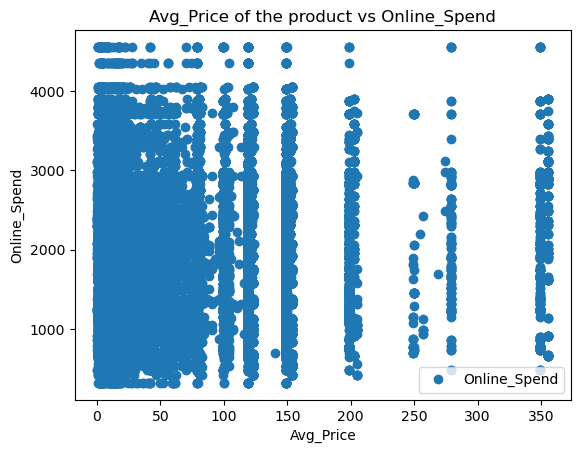

In [13]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Avg_Price', y='Online_Spend',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Avg_Price of the product vs Online_Spend')  
plt.xlabel('Avg_Price')  
plt.ylabel('Online_Spend')  
plt.show()

In [14]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Avg_Price'].values.reshape(-1,1)
y = df['Online_Spend'].values.reshape(-1,1)

In [15]:
X

array([[153.71],
       [153.71],
       [122.77],
       ...,
       [ 10.8 ],
       [  9.6 ],
       [  5.59]])

In [16]:
y

array([[2424.5 ],
       [2424.5 ],
       [2424.5 ],
       ...,
       [2230.76],
       [2230.76],
       [2230.76]])

In [17]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Regression Analysis

In [18]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [19]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [20]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

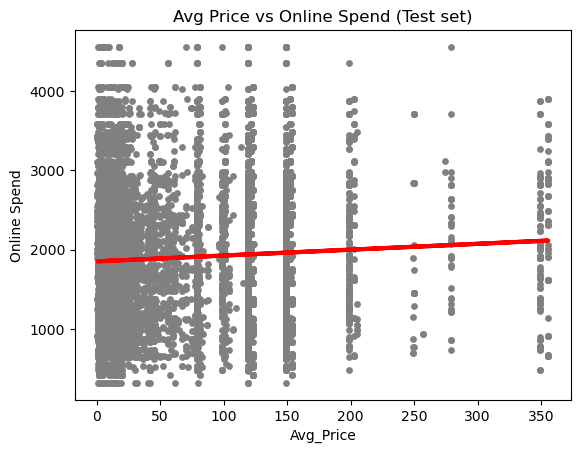

In [21]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Avg Price vs Online Spend (Test set)')
plot_test.xlabel('Avg_Price')
plot_test.ylabel('Online Spend')
plot_test.show()

#### The relationship between avg_Price and Online Spend is not strong. There are outliers in the data, that might be affecting the result. Most of the product's avg_Price is less than 100 dollors. So it might produce better results by removing outliers.

In [22]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [23]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.73865272]]
Mean squared error:  652785.0242568871
R2 score:  0.004205680091293296


In [24]:
y_predicted

array([[1862.73313031],
       [1857.34835201],
       [1860.52455869],
       ...,
       [1863.47178303],
       [1863.47178303],
       [1857.41483076]])

In [25]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,2719.46,1862.733130
1,2425.35,1857.348352
2,2330.24,1860.524559
3,2719.46,1868.642352
4,2091.61,1865.687741
5,1072.89,1938.821747
6,2330.24,1868.095749
7,2574.56,1862.142208
8,1218.60,1960.981328
9,1169.05,1853.869298


- There are large gap between predicted values and actual values. This model is not good at predicting Online Spend based on the average price. 
- This indicates we need to remove the outliers and conduct the analysis for smaller group of the data. Also it might be helpful to analyze the data based on certain products only to see if it can predict better

### Performance improvement after removing outliers

In [26]:
# Clean the extreme values from the ""Avg_Price" " variable observed during the consistency checks.

df_test = df[df["Avg_Price"] <=100] 

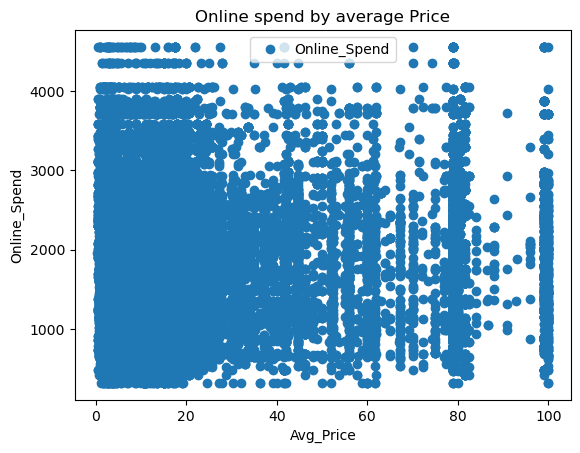

In [27]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'Avg_Price', y='Online_Spend', style='o')  
plt.title('Online spend by average Price')  
plt.xlabel('Avg_Price')  
plt.ylabel('Online_Spend')  
plt.show()

In [28]:
# Reshape again.

X_2 = df_test['Avg_Price'].values.reshape(-1,1)
y_2 = df_test['Online_Spend'].values.reshape(-1,1)

In [29]:
X_2

array([[81.5 ],
       [81.5 ],
       [81.5 ],
       ...,
       [10.8 ],
       [ 9.6 ],
       [ 5.59]])

In [30]:
y_2

array([[2424.5 ],
       [2424.5 ],
       [2424.5 ],
       ...,
       [2230.76],
       [2230.76],
       [2230.76]])

In [31]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [32]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [33]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [34]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [35]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.79877349]]
Mean squared error:  621848.7351334121
R2 score:  0.00035299276145139835


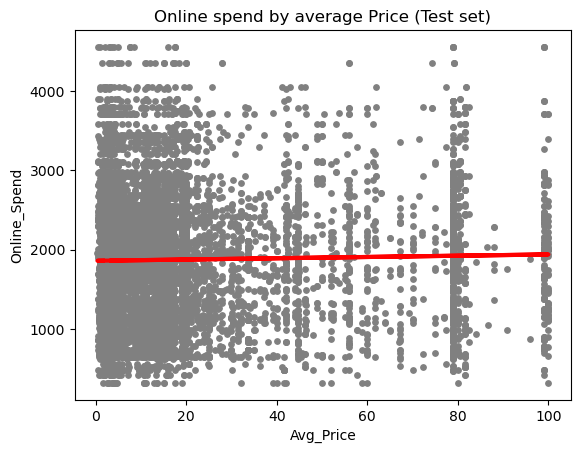

In [38]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Online spend by average Price (Test set)')
plot_test.xlabel('Avg_Price')
plot_test.ylabel('Online_Spend')
plot_test.show()

In [37]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,2435.12,1861.369675
1,767.58,1862.559848
2,1984.92,1869.429300
3,2331.31,1869.189668
4,1128.09,1870.307951
5,2435.12,1912.243559
6,1528.10,1867.064930
7,659.57,1873.742677
8,770.87,1859.844018
9,515.44,1865.978598
